# PROJECT :  Creating clusters on global development measurement dataset

### EDA Tasks:
#### Data Cleaning and preprocessing
1) Handling Missing values
1) Handling datatype mismatches(structural errors)
2) Removing Duplicates
3) Managing outliers

#### Data transformation and Feature engineering
1) Scaling and Normalising.
2) Encoding categorical variables.

#### Visualisations
1) Univariate plots: Frequency plots, Bar plots, pie charts, box plots etc
2) Bivariate plots: Scatter plots, Heatmaps, etc
3) Multivariate plots: Pair plots, Correlation heatmaps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

     ---------------------------------------- 0.0/819.0 kB ? eta -:--:--
     ------------------------ ------------- 524.3/819.0 kB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 819.0/819.0 kB 2.7 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp313-cp313-win_amd64.whl size=378577 sha256=3e84ec28c24fad61776d2ce4e1db114558b4598ffe4f05e9b08d1df85eb30173
  Stored in directory: c:\users\srees_lappy\appdata\local\pip\cache\wheels\17\4b\b8\6b6711681d0981b110c9cc91ad6d1ebd88adf1547e1da301fc
Successfully built scikit-learn-extra


In [3]:
df=pd.read_excel("World_development_mesurement.xlsx",sheet_name="world_development")

In [4]:
df.head()

Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   

   Tourism Outbound  
0      $193,000,000  
1      $146,000,000  
2       $50,000,000  
3      $209,000,000  
4       $30,000,000  

[5 rows x 25 columns]

In [66]:
df.tail()

Birth Rate  CO2 Emissions                   Country  \
2699       0.020         8529.0  Turks and Caicos Islands   
2700       0.013         8529.0             United States   
2701       0.015         8529.0                   Uruguay   
2702       0.020         8529.0             Venezuela, RB   
2703       0.011         8529.0     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
2699                    26.0       14338.0  1.507975e+10             0.061   
2700                     7.0      199782.0  1.088917e+12             0.106   
2701                     7.0       14338.0  5.000435e+10             0.089   
2702                    94.0       14338.0  3.812862e+11             0.046   
2703                    26.0       14338.0  1.507975e+10             0.061   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
2699              193.0                  0.020             0.1   
2700             3982.0                  0.006             0.8   
2701             1308.0                  0.010             0.5   
2702              593.0                  0.013             0.5   
2703              193.0                  0.020             0.4   

      Lending Interest  Mobile Phone Usage  Population Total  \
2699             0.120                 0.5             56350   
2700             0.053                 1.0         113529819   
2701             0.112                 1.4           3395253   
2702             0.164                 1.0          29954782   
2703             0.120                 0.5            105275   

      Population Urban  Tourism Inbound  Tourism Outbound  \
2699             0.911     6.885000e+08      4.560000e+08   
2700             0.811     1.926100e+10      1.963600e+10   
2701             0.947     2.222000e+09      1.028000e+09   
2702             0.889     9.040000e+08      3.202000e+09   
2703             0.947     6.885000e+08      4.560000e+08   

      Avg Life Expectancy  DBSCAN_Cluster  cluster  
2699                 72.0               0        0  
2700                 78.5               0        0  
2701                 77.0               0        0  
2702                 75.0               0        0  
2703                 79.5               0        0

In [5]:
df.shape

(2704, 25)

In [6]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [7]:
df.describe()

Birth Rate  CO2 Emissions  Days to Start Business  Ease of Business  \
count  2585.000000   2.125000e+03             1718.000000        185.000000   
mean      0.022715   1.423071e+05               39.999418         94.875676   
std       0.011338   6.159288e+05               57.318588         54.791906   
min       0.007000   7.000000e+00                1.000000          1.000000   
25%       0.013000   1.360000e+03               13.000000         48.000000   
50%       0.020000   8.529000e+03               26.000000         94.000000   
75%       0.031000   5.910800e+04               45.000000        142.000000   
max       0.053000   8.286892e+06              694.000000        189.000000   

       Energy Usage  Health Exp % GDP  Hours to do Tax  Infant Mortality Rate  \
count  1.785000e+03       2395.000000      1416.000000            2444.000000   
mean   7.723684e+04          0.064170       302.068503               0.032813   
std    2.599239e+05          0.026325       273.299686               0.029968   
min    8.000000e+00          0.008000        12.000000               0.002000   
25%    3.737000e+03          0.046000       156.000000               0.009000   
50%    1.433800e+04          0.061000       239.000000               0.020000   
75%    4.185200e+04          0.079000       344.750000               0.053000   
max    2.727728e+06          0.225000      2600.000000               0.141000   

       Internet Usage  Lending Interest  Life Expectancy Female  \
count     2531.000000       1880.000000             2568.000000   
mean         0.239747          0.148103               71.159268   
std          0.260132          0.171829               10.708262   
min          0.000000          0.005000               39.000000   
25%          0.000000          0.080000               64.000000   
50%          0.100000          0.120000               75.000000   
75%          0.400000          0.173000               79.000000   
max          1.000000          4.965000               87.000000   

       Life Expectancy Male  Mobile Phone Usage  Number of Records  \
count           2568.000000         2537.000000             2704.0   
mean              66.461838            0.578124                1.0   
std                9.390217            0.474647                0.0   
min               37.000000            0.000000                1.0   
25%               61.000000            0.100000                1.0   
50%               69.000000            0.500000                1.0   
75%               73.250000            0.900000                1.0   
max               88.000000            2.900000                1.0   

       Population 0-14  Population 15-64  Population 65+  Population Total  \
count      2484.000000       2484.000000     2484.000000      2.704000e+03   
mean          0.303051          0.623481        0.073465      3.145729e+07   
std           0.106577          0.069660        0.049541      1.242894e+08   
min           0.118000          0.474000        0.003000      1.887600e+04   
25%           0.204750          0.559000        0.033000      8.783360e+05   
50%           0.299500          0.642500        0.052000      5.800324e+06   
75%           0.402000          0.676000        0.112000      2.014089e+07   
max           0.500000          0.858000        0.244000      1.350695e+09   

       Population Urban  
count       2678.000000  
mean           0.562953  
std            0.245897  
min            0.082000  
25%            0.356000  
50%            0.560000  
75%            0.765000  
max            1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

#### Handling mismatched  datatypes:

In [9]:
df.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object

Columns like 'Days to start business', 'GDP', 'HealthExp/Capita' , 'Tourism Inbound' , and 'Tourism Outbound are object
type, so changing them to int or float

In [10]:
cols = ['GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']
for col in cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_9328\863355642.py:3: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


In [11]:
df.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

#### Handling Missing values

In [12]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

##### Number of Records -- Metadata, not meaningful for development level

In [13]:
df['Number of Records'].value_counts()
# since it adds nothing in develpoment measurement ,dropping it.

Number of Records
1    2704
Name: count, dtype: int64

##### Dropping all these columns because they have around 50% missing values

In [14]:
df.drop(['Business Tax Rate','Ease of Business','Hours to do Tax','Number of Records'],axis=1,inplace=True)

In [15]:
df.isnull().sum()

Birth Rate                119
CO2 Emissions             579
Country                     0
Days to Start Business    986
Energy Usage              919
GDP                       210
Health Exp % GDP          309
Health Exp/Capita         309
Infant Mortality Rate     260
Internet Usage            173
Lending Interest          824
Life Expectancy Female    136
Life Expectancy Male      136
Mobile Phone Usage        167
Population 0-14           220
Population 15-64          220
Population 65+            220
Population Total            0
Population Urban           26
Tourism Inbound           368
Tourism Outbound          471
dtype: int64

##### Median imputation for all numeric columns with missing values

In [16]:
cols_with_missing = [
    "Birth Rate", "CO2 Emissions", "Days to Start Business", "Energy Usage",
    "Health Exp % GDP", "Infant Mortality Rate", "Internet Usage",
    "Lending Interest", "Life Expectancy Female", "Life Expectancy Male",
    "Mobile Phone Usage", "Population 0-14", "Population 15-64", "Population 65+",
    "Population Urban","GDP","Health Exp/Capita","Tourism Inbound","Tourism Outbound"
]

for col in cols_with_missing:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_9328\2008363157.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_9328\2008363157.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [17]:
#Verify no missing values left
print("Missing values after imputation:")
df.isnull().sum()

Missing values after imputation:


Birth Rate                0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

#### Checking for duplicates:

In [18]:
df.duplicated().sum()  #No duplicates 

np.int64(0)

#### Managing Outliers

In [19]:
df.head()

Birth Rate  CO2 Emissions       Country  Days to Start Business  \
0       0.020        87931.0       Algeria                    26.0   
1       0.050         9542.0        Angola                    26.0   
2       0.043         1617.0         Benin                    26.0   
3       0.027         4276.0      Botswana                    26.0   
4       0.046         1041.0  Burkina Faso                    26.0   

   Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
0       26998.0  5.479006e+10             0.035               60.0   
1        7499.0  9.129595e+09             0.034               22.0   
2        1983.0  2.359122e+09             0.043               15.0   
3        1836.0  5.788312e+09             0.047              152.0   
4       14338.0  2.610959e+09             0.051               12.0   

   Infant Mortality Rate  Internet Usage  ...  Life Expectancy Female  \
0                  0.034             0.0  ...                    71.0   
1                  0.128             0.0  ...                    47.0   
2                  0.090             0.0  ...                    57.0   
3                  0.054             0.0  ...                    52.0   
4                  0.096             0.0  ...                    52.0   

   Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                  67.0                 0.0            0.342   
1                  44.0                 0.0            0.476   
2                  53.0                 0.0            0.454   
3                  49.0                 0.1            0.383   
4                  49.0                 0.0            0.468   

   Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.619           0.039          31719449             0.599   
1             0.499           0.025          13924930             0.324   
2             0.517           0.029           6949366             0.383   
3             0.587           0.029           1755375             0.532   
4             0.505           0.028          11607944             0.178   

   Tourism Inbound  Tourism Outbound  
0      102000000.0       193000000.0  
1       34000000.0       146000000.0  
2       77000000.0        50000000.0  
3      227000000.0       209000000.0  
4       23000000.0        30000000.0  

[5 rows x 21 columns]

#### Univariate Analysis: Creating boxplots for all numeric columns (2 per row) to visually identify outliers and understand the spread of each variable.

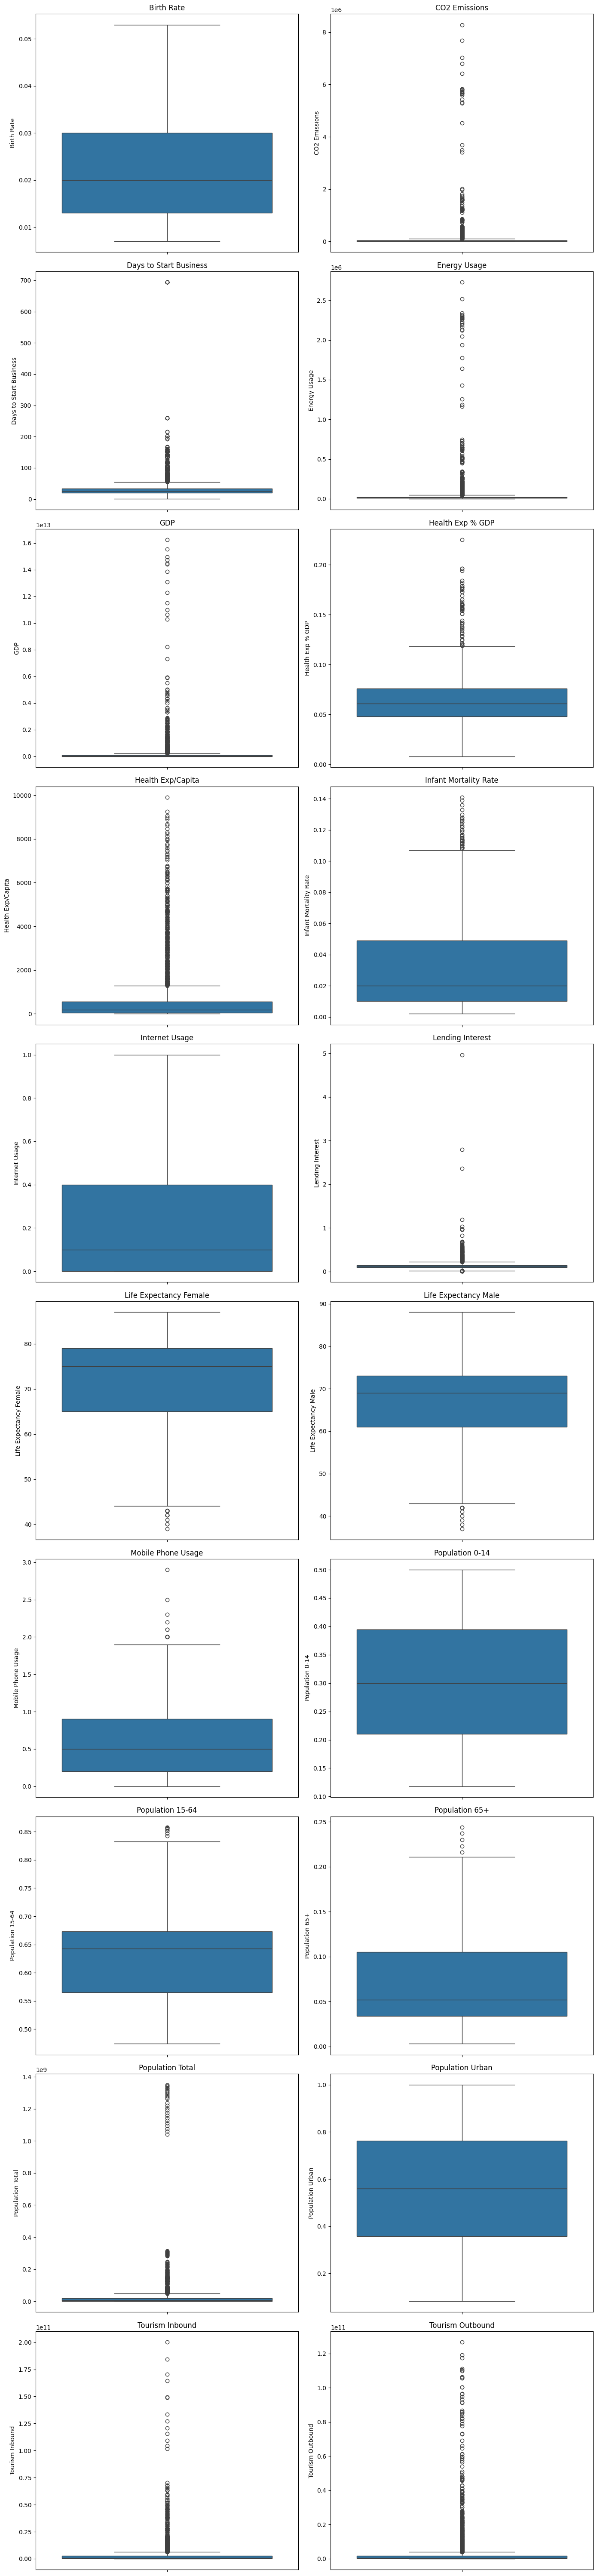

In [20]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(14, 6 * ((len(numeric_cols) + 1)//2)))  # adjust height dynamically

# Plot boxplots for each numeric feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 1)//2, 2, i)  # 2 plots per row
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

##### IQR is calculated for each numeric feature, for detecting rows where any value is outside 1.5 × IQR, and counts how many such outlier rows exist.

In [21]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Rows with any feature outside 1.5*IQR
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("Number of outlier rows:", outliers.sum())

Number of outlier rows: 1347


* Using Winsorization technique to handle outliers without deleting any records. 
* Instead of removing extreme values, it caps them at the 5th and 95th percentile limits.
* This means any values below the 5th percentile are set to that threshold, and values above the 95th percentile are pulled down accordingly. 
* By doing this, the dataset keeps all original rows while preventing extreme observations from skewing averages, variances, and model performance. 
* Compared to outright removal, winsorizing preserves data size and avoids introducing bias.

In [22]:
from scipy.stats.mstats import winsorize

numeric_cols = df.select_dtypes(include=np.number).columns

# Cap values at 5th and 95th percentile
df[numeric_cols] = df[numeric_cols].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))

##### Feature extraction

* Population breakdown (0–14, 15–64, 65+, Total, Urban)
    * These are highly correlated (since they add up to Population Total).
    * Keeping Population Total or % Urban (more meaningful) and dropping the other three

In [23]:
df.drop(['Population 0-14','Population 15-64','Population 65+'],axis=1,inplace=True)

##### Life Expectancy Female & Male → Very correlated. Combining into one (e.g., average life expectancy).

In [24]:
df["Avg Life Expectancy"] = (df["Life Expectancy Male"] + df["Life Expectancy Female"]) / 2
df.drop(columns=["Life Expectancy Male", "Life Expectancy Female"], inplace=True)

In [25]:
print(df.shape)
df.head()

(2704, 17)


Birth Rate  CO2 Emissions       Country  Days to Start Business  \
0       0.020        87931.0       Algeria                    26.0   
1       0.044         9542.0        Angola                    26.0   
2       0.043         1617.0         Benin                    26.0   
3       0.027         4276.0      Botswana                    26.0   
4       0.044         1041.0  Burkina Faso                    26.0   

   Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
0       26998.0  5.479006e+10             0.035               60.0   
1        7499.0  9.129595e+09             0.034               22.0   
2        1983.0  2.359122e+09             0.043               15.0   
3        1836.0  5.788312e+09             0.047              152.0   
4       14338.0  2.610959e+09             0.051               15.0   

   Infant Mortality Rate  Internet Usage  Lending Interest  \
0                  0.034             0.0             0.100   
1                  0.092             0.0             0.268   
2                  0.090             0.0             0.120   
3                  0.054             0.0             0.155   
4                  0.092             0.0             0.120   

   Mobile Phone Usage  Population Total  Population Urban  Tourism Inbound  \
0                 0.0          31719449             0.599      102000000.0   
1                 0.0          13924930             0.324       34000000.0   
2                 0.0           6949366             0.383       77000000.0   
3                 0.1           1755375             0.532      227000000.0   
4                 0.0          11607944             0.178       23000000.0   

   Tourism Outbound  Avg Life Expectancy  
0       193000000.0                 69.0  
1       146000000.0                 49.0  
2        50000000.0                 55.0  
3       209000000.0                 50.5  
4        30000000.0                 50.5

#### Standardisation:

* Country -- Just an identifier, doesn’t help clustering

In [26]:
countries=df['Country'] #so storing it in countries variable

In [27]:
from sklearn.preprocessing import StandardScaler

X=df.drop(columns=["Country"])   # drop categorical feature

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [29]:
X_scaled

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0      -0.228817       0.303171               -0.246495     -0.100467   
1       2.001476      -0.412621               -0.246495     -0.486907   
2       1.908547      -0.484987               -0.246495     -0.596225   
3       0.421685      -0.460707               -0.246495     -0.599139   
4       2.001476      -0.490246               -0.246495     -0.351368   
...          ...            ...                     ...           ...   
2699   -0.228817      -0.421871               -0.246495     -0.351368   
2700   -0.879319      -0.421871               -1.147458      3.323846   
2701   -0.693461      -0.421871               -1.147458     -0.351368   
2702   -0.228817      -0.421871                2.978003     -0.351368   
2703   -1.065176      -0.421871               -0.246495     -0.351368   

           GDP  Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  \
0    -0.269018         -1.349167          -0.545931               0.115138   
1    -0.439423         -1.397477          -0.581305               2.268925   
2    -0.464690         -0.962685          -0.587821               2.194656   
3    -0.451893         -0.769444          -0.460289               0.857823   
4    -0.463751         -0.576203          -0.587821               2.268925   
...        ...               ...                ...                    ...   
2699 -0.417217         -0.093101          -0.422122              -0.404741   
2700  3.590339          2.080859           3.105029              -0.924621   
2701 -0.286879          1.259586           0.615823              -0.776084   
2702  0.949464         -0.817754          -0.049765              -0.664681   
2703 -0.417217         -0.093101          -0.422122              -0.404741   

      Internet Usage  Lending Interest  Mobile Phone Usage  Population Total  \
0          -0.919310         -0.543171           -1.295062          0.466265   
1          -0.919310          2.575281           -1.295062         -0.148725   
2          -0.919310         -0.171927           -1.295062         -0.389805   
3          -0.919310          0.477751           -1.064859         -0.569313   
4          -0.919310         -0.171927           -1.295062         -0.228802   
...              ...               ...                 ...               ...   
2699       -0.517400         -0.171927           -0.144047         -0.628032   
2700        2.295972         -1.415596            1.006967          3.293684   
2701        1.090241         -0.320425            1.927779         -0.512638   
2702        1.090241          0.644811            1.006967          0.405277   
2703        0.688331         -0.171927           -0.144047         -0.626342   

      Population Urban  Tourism Inbound  Tourism Outbound  Avg Life Expectancy  
0             0.153519        -0.559548         -0.474419            -0.004002  
1            -1.002801        -0.572785         -0.483622            -2.147047  
2            -0.754718        -0.564415         -0.502419            -1.504134  
3            -0.128203        -0.535216         -0.471286            -1.986319  
4            -1.616702        -0.574927         -0.506335            -1.986319  
...                ...              ...               ...                  ...  
2699          1.465416        -0.445380         -0.422923             0.317454  
2700          1.044936         3.169947          3.332551             1.013944  
2701          1.616789        -0.146869         -0.310925             0.853216  
2702          1.372910        -0.403431          0.114748             0.638911  
2703          1.616789        -0.445380         -0.422923             1.121096  

[2704 rows x 16 columns]

In [30]:
X_scaled.columns

Index(['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage',
       'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Mobile Phone Usage',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'Avg Life Expectancy'],
      dtype='object')

In [31]:
print("Summary Statistics:\n", X_scaled.describe())

Summary Statistics:
          Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
count  2.704000e+03   2.704000e+03            2.704000e+03  2.704000e+03   
mean  -1.366428e-16  -5.255494e-18           -6.306592e-17  5.781043e-17   
std    1.000185e+00   1.000185e+00            1.000185e+00  1.000185e+00   
min   -1.251034e+00  -4.981084e-01           -1.147458e+00 -6.190761e-01   
25%   -8.793187e-01  -4.793254e-01           -5.310097e-01 -4.799158e-01   
50%   -2.288167e-01  -4.218714e-01           -2.464951e-01 -3.513683e-01   
75%    7.004719e-01  -1.111065e-01            1.447124e-01 -1.702573e-01   
max    2.001476e+00   3.265869e+00            2.978003e+00  3.323846e+00   

                GDP  Health Exp % GDP  Health Exp/Capita  \
count  2.704000e+03      2.704000e+03       2.704000e+03   
mean  -2.102197e-17      1.471538e-16       1.051099e-17   
std    1.000185e+00      1.000185e+00       1.000185e+00   
min   -4.715682e-01     -1.590718e+00      -5.878211e-

#### Bivariate Analysis

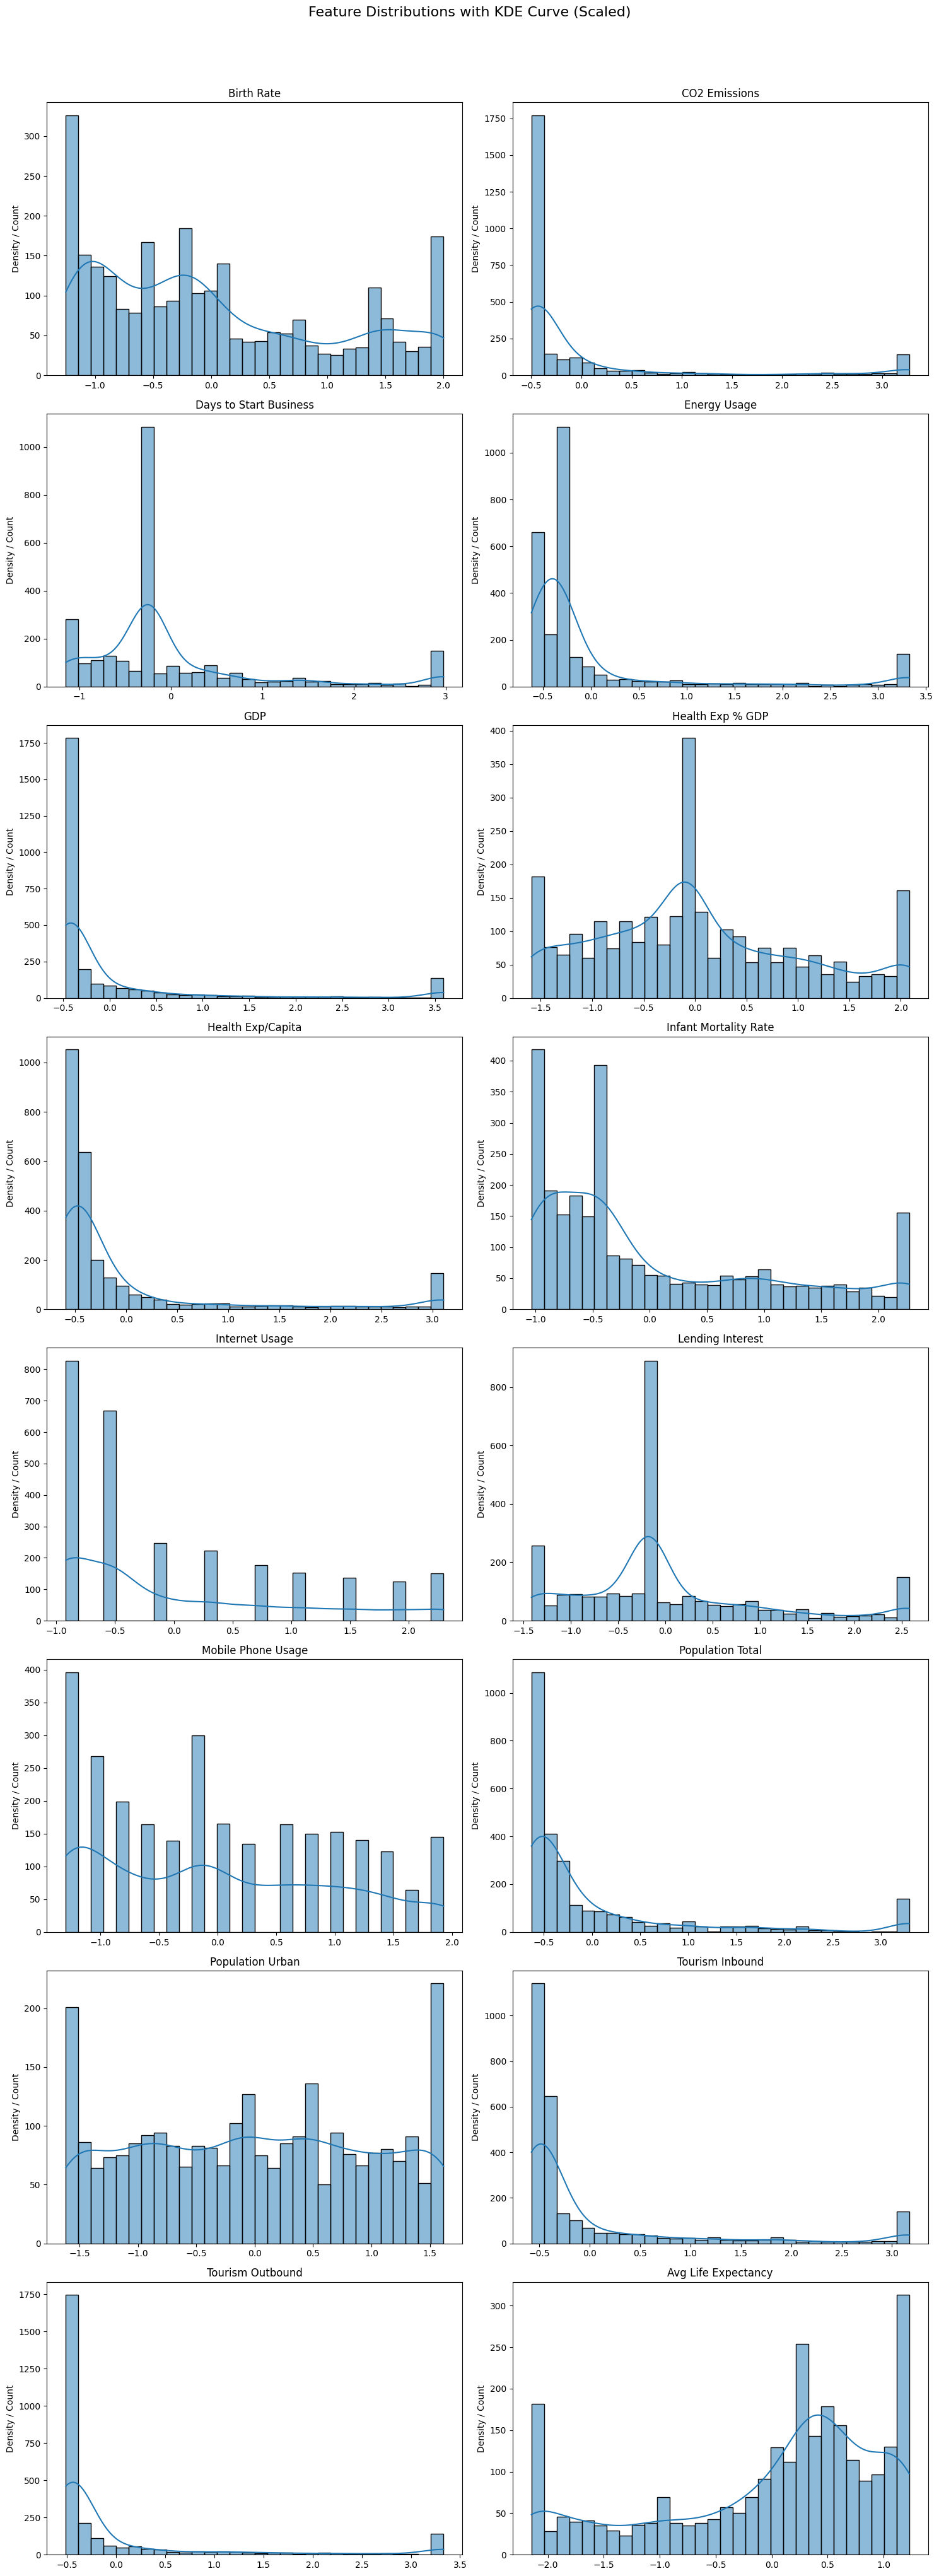

In [32]:
numeric_cols = X_scaled.columns
n_rows = (len(numeric_cols)+1) // 2

plt.figure(figsize=(15, 5 * n_rows))
plt.suptitle("Feature Distributions with KDE Curve (Scaled)", fontsize=16, y=1.02)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows,2, i)
    sns.histplot(X_scaled[col], kde=True, bins=30)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Density / Count")

plt.tight_layout()
plt.show()

#### Correlation Heatmap
* This heatmap shows how strongly features are correlated with one another. It helps detect multicollinearity and spot redundant variables that may affect modeling.

In [33]:
X_scaled.corr()

Birth Rate  CO2 Emissions  Days to Start Business  \
Birth Rate                1.000000      -0.294350                0.254993   
CO2 Emissions            -0.294350       1.000000               -0.042350   
Days to Start Business    0.254993      -0.042350                1.000000   
Energy Usage             -0.274600       0.892347               -0.074531   
GDP                      -0.342936       0.752431               -0.118690   
Health Exp % GDP         -0.256084       0.109030               -0.179134   
Health Exp/Capita        -0.470577       0.283254               -0.257684   
Infant Mortality Rate     0.872211      -0.242568                0.261835   
Internet Usage           -0.636028       0.178041               -0.320247   
Lending Interest          0.409232      -0.188998                0.231812   
Mobile Phone Usage       -0.554213       0.114989               -0.262866   
Population Total         -0.026628       0.657731                0.030834   
Population Urban         -0.596061       0.240437               -0.194538   
Tourism Inbound          -0.436484       0.622185               -0.214044   
Tourism Outbound         -0.391570       0.670141               -0.183586   
Avg Life Expectancy      -0.859733       0.237713               -0.290188   

                        Energy Usage       GDP  Health Exp % GDP  \
Birth Rate                 -0.274600 -0.342936         -0.256084   
CO2 Emissions               0.892347  0.752431          0.109030   
Days to Start Business     -0.074531 -0.118690         -0.179134   
Energy Usage                1.000000  0.877154          0.158896   
GDP                         0.877154  1.000000          0.291890   
Health Exp % GDP            0.158896  0.291890          1.000000   
Health Exp/Capita           0.348972  0.542053          0.490488   
Infant Mortality Rate      -0.216923 -0.309887         -0.226282   
Internet Usage              0.252773  0.423561          0.357836   
Lending Interest           -0.196858 -0.268935         -0.035614   
Mobile Phone Usage          0.152963  0.298436          0.223596   
Population Total            0.751854  0.647537         -0.045908   
Population Urban            0.228321  0.311854          0.214014   
Tourism Inbound             0.691734  0.839093          0.332581   
Tourism Outbound            0.778708  0.916103          0.327000   
Avg Life Expectancy         0.228328  0.342311          0.245784   

                        Health Exp/Capita  Infant Mortality Rate  \
Birth Rate                      -0.470577               0.872211   
CO2 Emissions                    0.283254              -0.242568   
Days to Start Business          -0.257684               0.261835   
Energy Usage                     0.348972              -0.216923   
GDP                              0.542053              -0.309887   
Health Exp % GDP                 0.490488              -0.226282   
Health Exp/Capita                1.000000              -0.494906   
Infant Mortality Rate           -0.494906               1.000000   
Internet Usage                   0.731853              -0.632127   
Lending Interest                -0.355102               0.422883   
Mobile Phone Usage               0.482442              -0.593482   
Population Total                 0.067312               0.041340   
Population Urban                 0.492737              -0.616233   
Tourism Inbound                  0.589356              -0.391516   
Tourism Outbound                 0.640984              -0.359202   
Avg Life Expectancy              0.511832              -0.925808   

                        Internet Usage  Lending Interest  Mobile Phone Usage  \
Birth Rate                   -0.636028          0.409232           -0.554213   
CO2 Emissions                 0.178041         -0.188998            0.114989   
Days to Start Business       -0.320247          0.231812           -0.262866   
Energy Usage                  0.252773         -0.196858            0.152963   


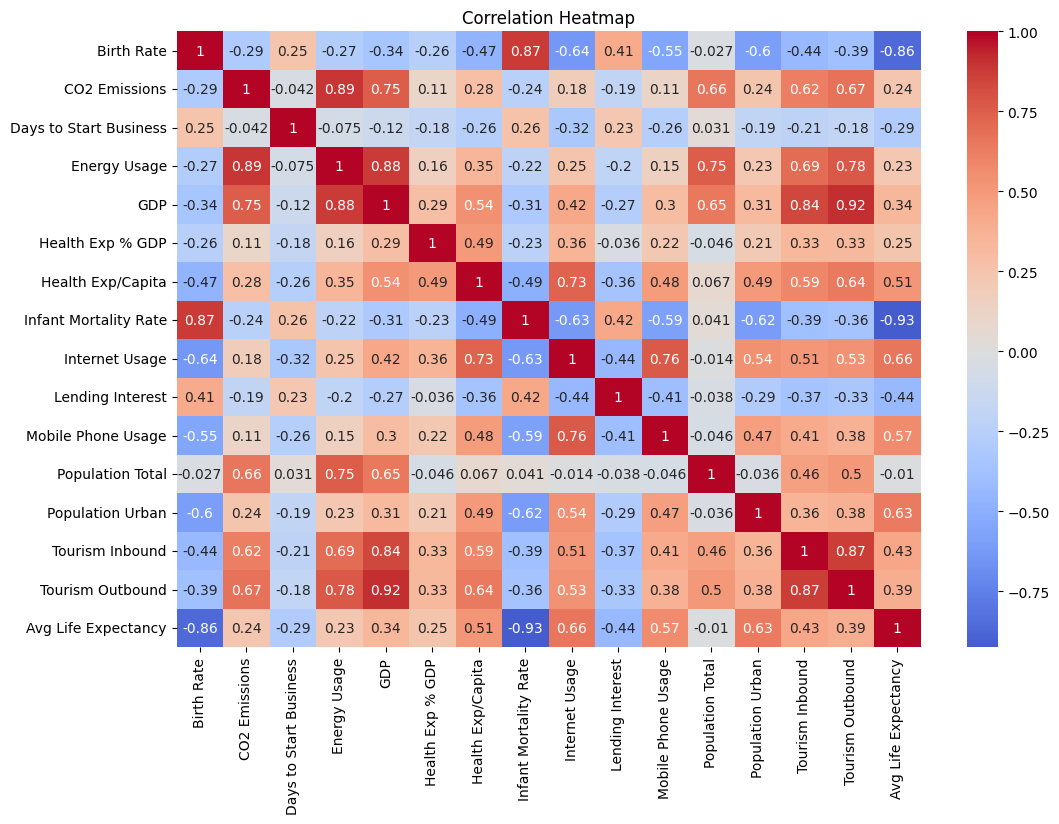

In [34]:
#Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(X_scaled.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

#### Key correlations:
* **Avg Life Expectancy** has an extremely strong inverse relationship with **Infant Mortality Rate** (-0.93$) and **Birth Rate** (-0.86$).
* **Infant Mortality Rate** is strongly inversely related to **Birth Rate** (-0.87$), indicating that lower fertility rates accompany better child survival.
* **GDP** shows a strong positive correlation with **Energy Usage** (0.88$), reflecting economic activity's high energy demand.
* **GDP** is strongly linked to healthcare spending, correlating positively with **Health Exp/Capita** (0.73$).
* **GDP** is strongly linked to demographics, correlating negatively with **Birth Rate** (-0.74$).
* **CO2 Emissions** are highly positively correlated with **Energy Usage** (0.89$), highlighting the environmental impact of current energy sources.
* **Mobile Phone Usage** is strongly inversely correlated with **Infant Mortality Rate** (-0.76$), suggesting that greater connectivity is a proxy for development that improves health outcomes.

#### Multivariate Analysis

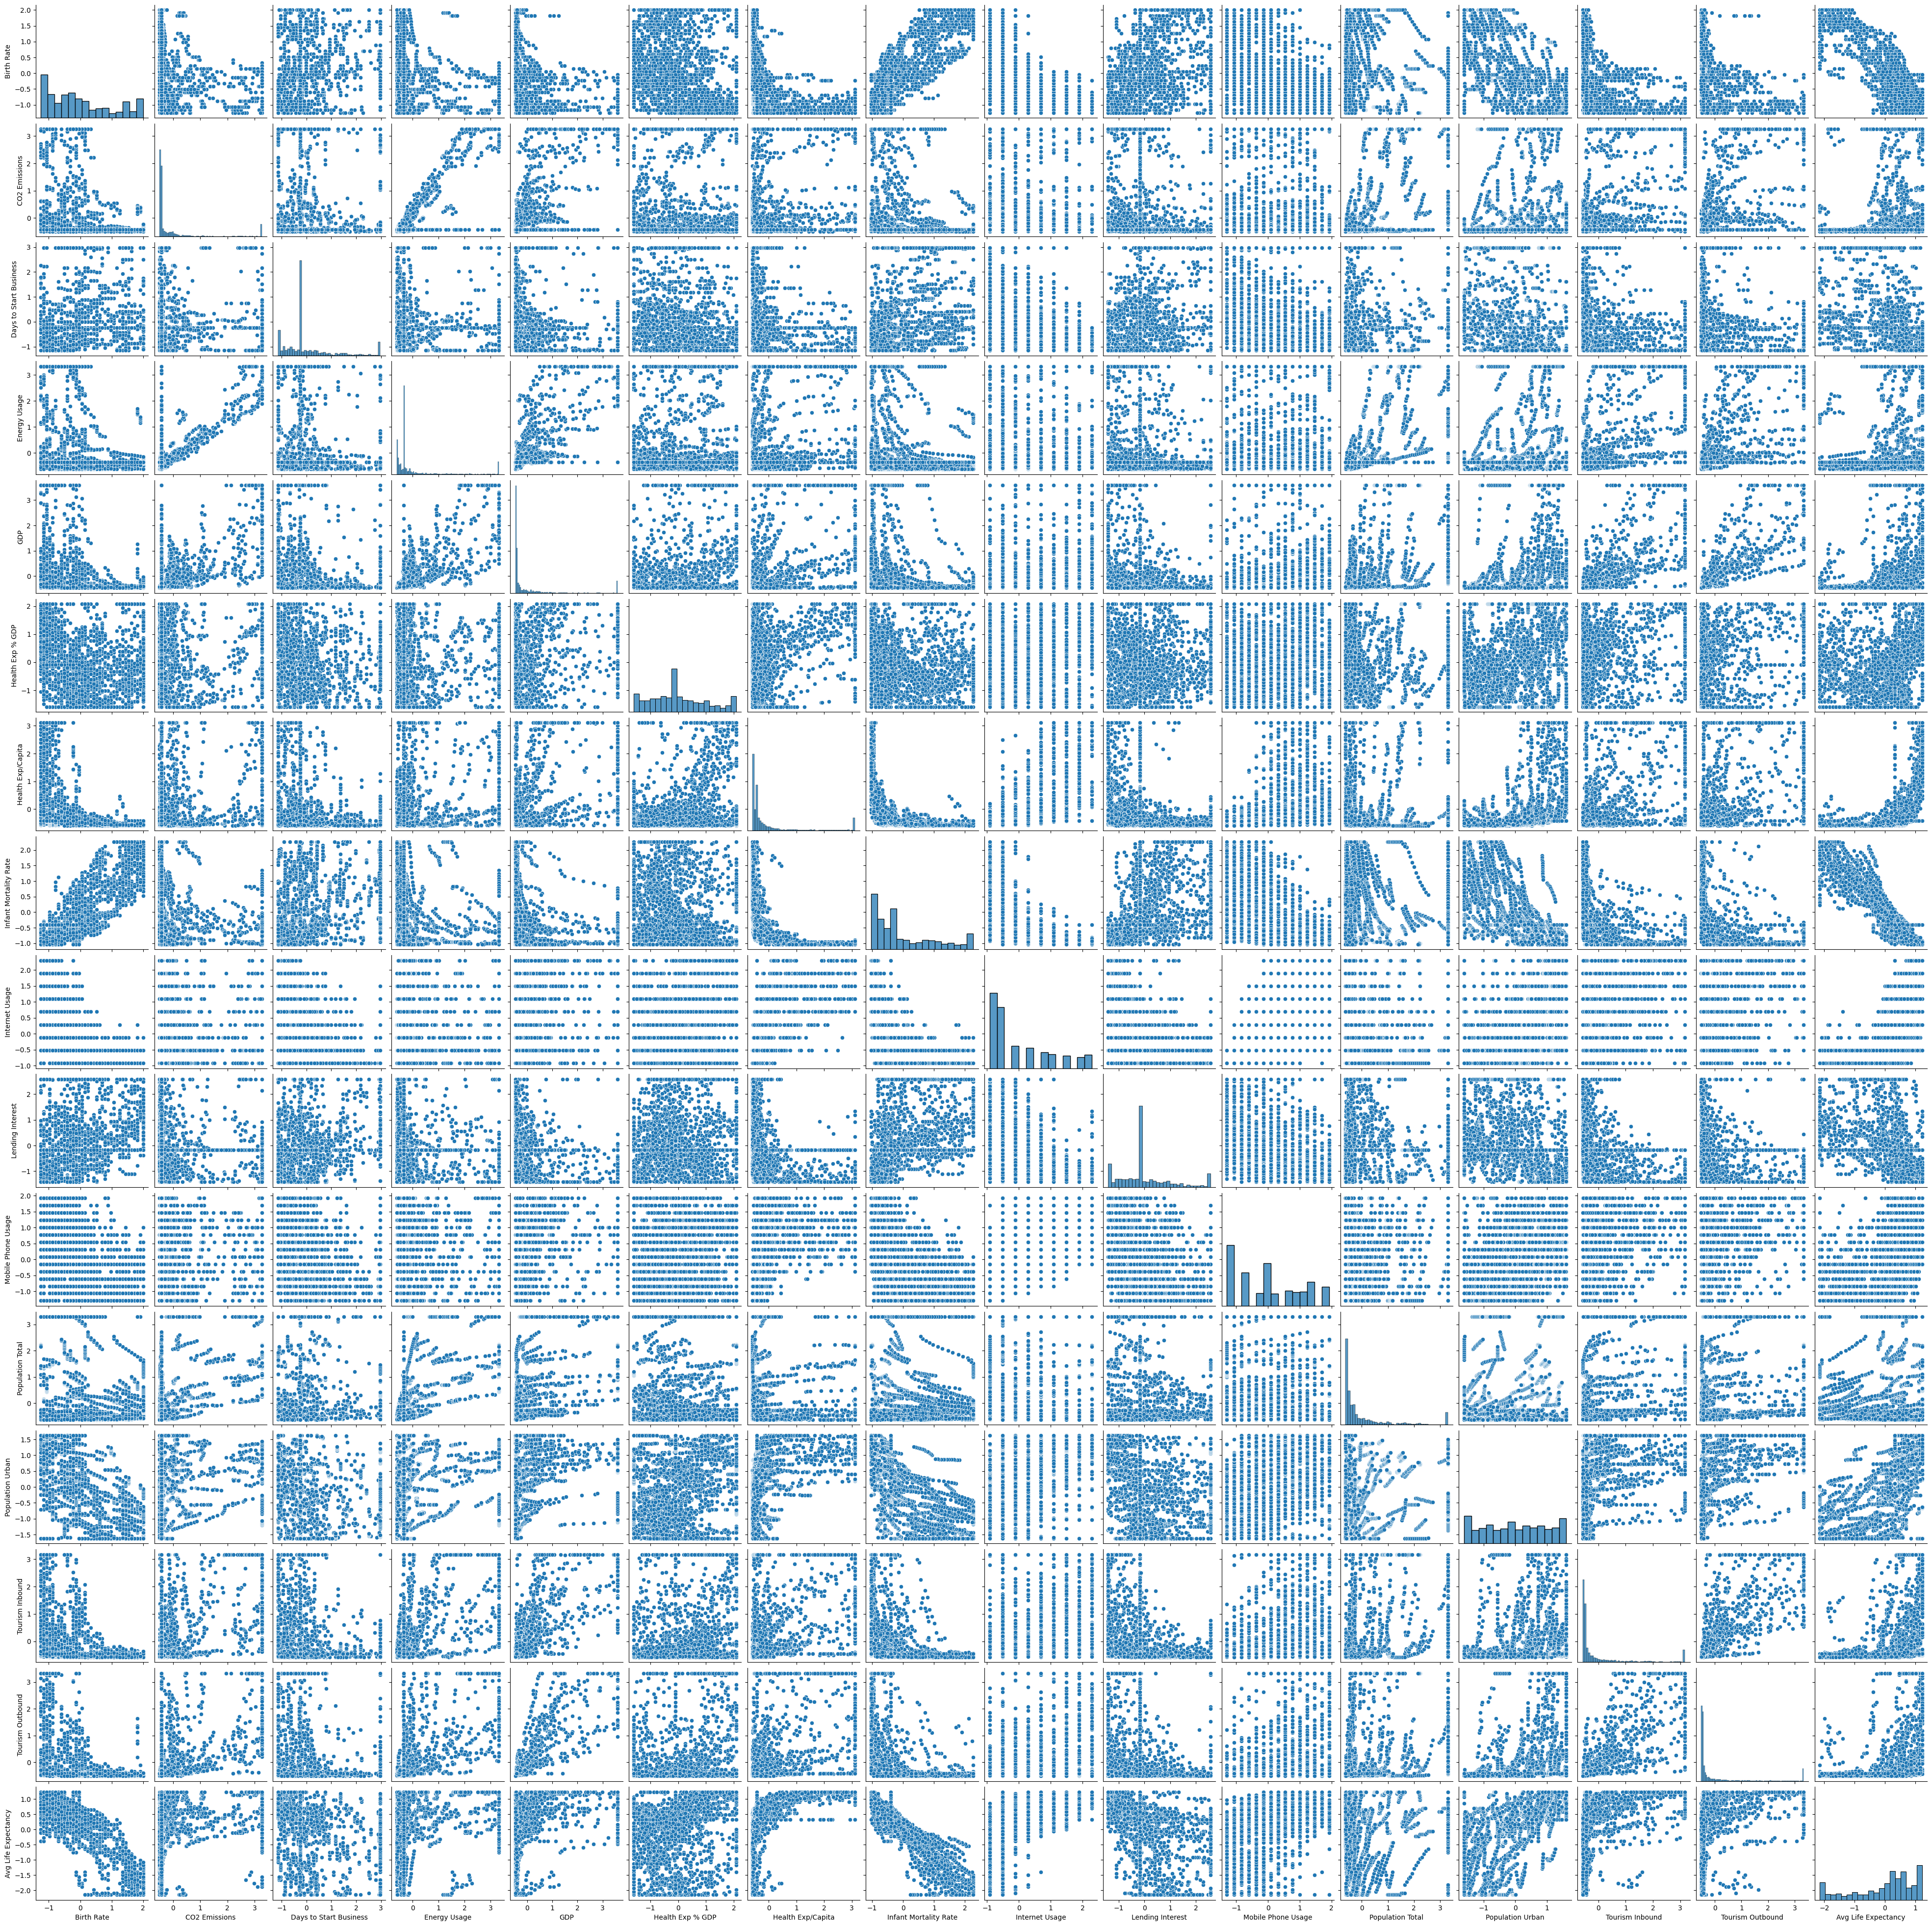

In [35]:
#Pairwise scatterplots
sns.pairplot(X_scaled)
plt.show()

#### Summary based on pair plot

- Strong Positive Relationships
    * GDP & Health Expenditure/Capita – Higher GDP countries spend more on health.
    * GDP & Internet/Mobile Usage – Better digital access in wealthier nations.
    * Tourism Inbound & Outbound – Developed countries both send and receive more tourists.
    * Avg Life Expectancy & Health Spending – More health investment links to longer lives.

- Negative Relationships
    * GDP & Infant Mortality – Lower GDP, higher child mortality.
    * Birth Rate & Avg Life Expectancy – Higher births, lower life expectancy.
    * CO₂ Emissions & Birth Rate – Industrial nations tend to have fewer births.

- Weak or No Clear Relations
    * Tourism vs Birth Rate
    * Energy Use vs Life Expectancy
    * Days to Start Business vs Health Spend
    * Lending Interest vs CO₂
    * Mobile Usage vs Urban Population

- Possible Multicollinearity: Some features mirror each other:
    * Mobile vs Internet Usage
    * Health Exp/Capita vs %GDP
    * Tourism Inbound vs GDP (in richer regions)

In [36]:
#Correlation insights
corr_matrix=X_scaled.corr()
high_corr=corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr=high_corr[high_corr < 1]
print("Highly correlated feature pairs:\n \n", high_corr.head(10))

Highly correlated feature pairs:
 
 Infant Mortality Rate  Avg Life Expectancy      0.925808
Avg Life Expectancy    Infant Mortality Rate    0.925808
Tourism Outbound       GDP                      0.916103
GDP                    Tourism Outbound         0.916103
CO2 Emissions          Energy Usage             0.892347
Energy Usage           CO2 Emissions            0.892347
                       GDP                      0.877154
GDP                    Energy Usage             0.877154
Infant Mortality Rate  Birth Rate               0.872211
Birth Rate             Infant Mortality Rate    0.872211
dtype: float64


In [37]:
# Get top 5 GDP indices
top_idx=X_scaled["GDP"].sort_values(ascending=False).head().index

# Fetch corresponding countries and scaled GDP
top_gdp=pd.DataFrame({
    "Country": df.loc[top_idx, "Country"].values,
    "GDP (standardized)":X_scaled.loc[top_idx,"GDP"].values
}, index=top_idx)

print("Top 5 countries with highest GDP (standardized):")
print(top_gdp)

Top 5 countries with highest GDP (standardized):
            Country  GDP (standardized)
1452  United States            3.590339
2645      Australia            3.590339
1516          China            3.590339
1519          India            3.590339
1419         Brazil            3.590339


In [38]:
#Get top 5 indices for Avg Life Expectancy
top_idx = X_scaled["Avg Life Expectancy"].sort_values(ascending=False).head().index

#Fetch corresponding countries and standardized Avg Life Expectancy
top_life=pd.DataFrame({
    "Country": df.loc[top_idx,"Country"].values,
    "Avg Life Expectancy (standardized)": X_scaled.loc[top_idx,"Avg Life Expectancy"].values
},index=top_idx)

print("Top 5 countries with highest Avg Life Expectancy (standardized):")
print(top_life)

Top 5 countries with highest Avg Life Expectancy (standardized):
         Country  Avg Life Expectancy (standardized)
729      Iceland                            1.228248
749   San Marino                            1.228248
2599      Greece                            1.228248
2601     Iceland                            1.228248
2602     Ireland                            1.228248


## MODEL DEVELOPMENT

### Elbow Method and Silhouette Score

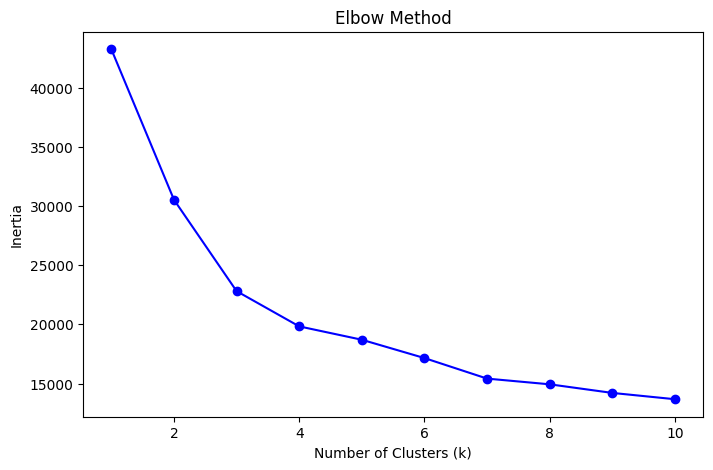

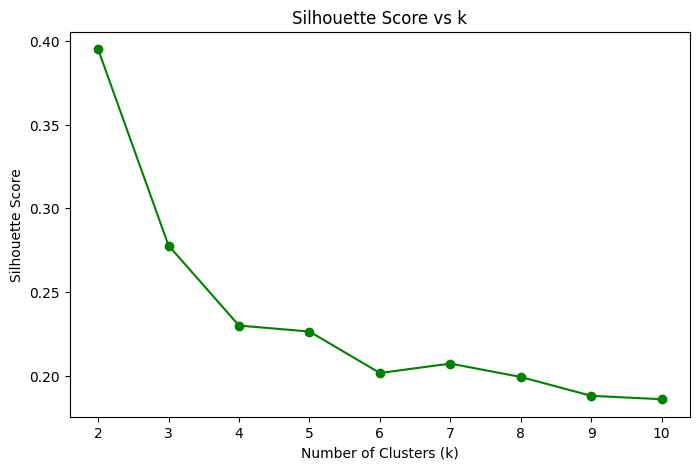

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Scale numeric data
X = df[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method 
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init="auto",   # works fine in new sklearn
        max_iter=300,
        random_state=42
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

#Silhouette Score
sil_scores = []
K = range(2, 11)  # silhouette requires >=2 clusters

for k in K:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init="auto",
        max_iter=300,
        random_state=42
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)



plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_scores, "go-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.show()


In [40]:
# FINAL CLEANING + SCALING (RUN FIRST)
# =========================================
from sklearn.preprocessing import StandardScaler

# Keep only numeric columns
X_final = df.select_dtypes(include=['float64', 'int64'])

# Drop NaNs before scaling
X_final = X_final.dropna()

# Align df with X_final
df = df.loc[X_final.index]

# Scale once
scaler_final = StandardScaler()
X_scaled_final = scaler_final.fit_transform(X_final)

print("✅ X_scaled_final ready:", X_scaled_final.shape)

✅ X_scaled_final ready: (2704, 16)


#### Elbow plot: suggested a bend around k = 3–4.

#### Silhouette plot: clearly favors k = 3.

## Train Models

In [41]:
results = {}
models_labels = {}

from sklearn.decomposition import PCA
def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', s=30)
    plt.title(title)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()

### 1.  K-Mean cluster

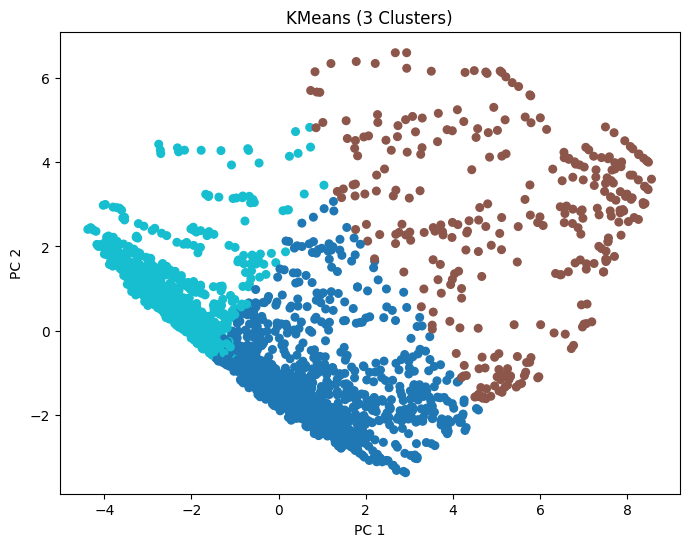

In [42]:
n_clusters = 3
results = {}
models_labels = {}

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_final)
results["KMeans"] = silhouette_score(X_scaled_final, kmeans_labels)
models_labels["KMeans"] = kmeans_labels
plot_clusters(X_scaled_final, kmeans_labels, f"KMeans ({n_clusters} Clusters)")


#### SUMMARY:
##### 1.The three clusters represent groups of countries with similar socio-economic and demographic patterns.

##### 2.This suggests that KMeans effectively partitions the dataset into three broad segments, though some overlap exists.

### 2.Agglomerative Clustering

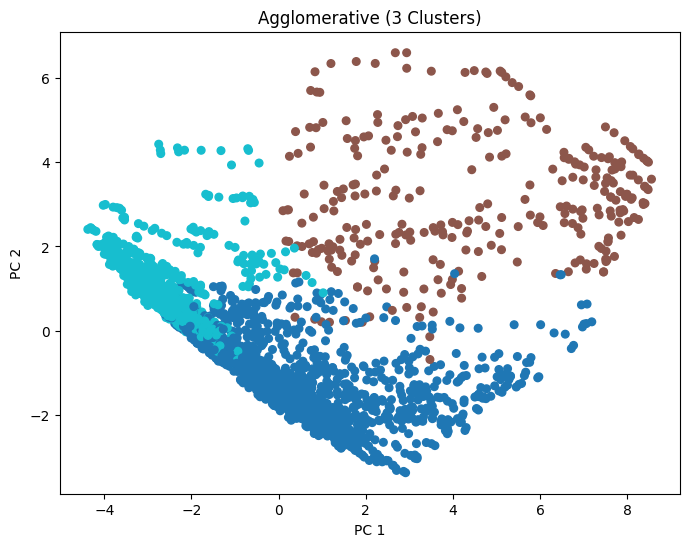

In [43]:
agg = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg.fit_predict(X_scaled_final)
results["Agglomerative"] = silhouette_score(X_scaled_final, agg_labels)
models_labels["Agglomerative"] = agg_labels
plot_clusters(X_scaled_final, agg_labels, f"Agglomerative ({n_clusters} Clusters)")



##### Agglomerative clustering partitions the dataset into three meaningful groups, similar to KMeans, but based on hierarchical similarity rather than centroids.

### 3. KMedoids clustering

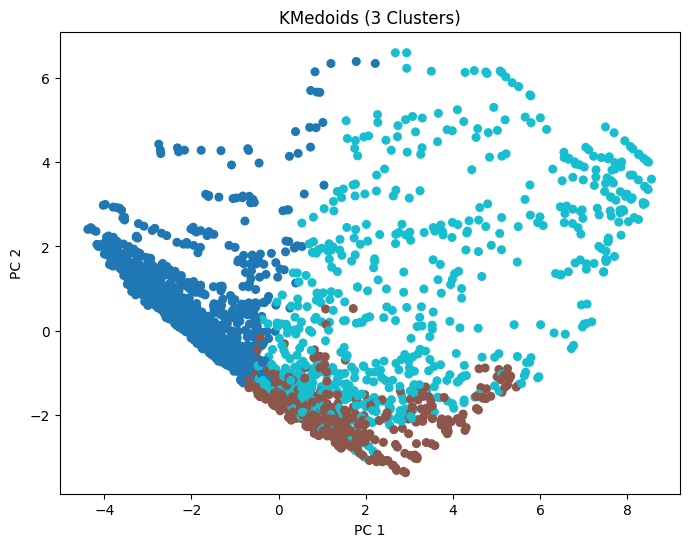

In [44]:
kmed = KMedoids(n_clusters=n_clusters, random_state=42)
kmed_labels = kmed.fit_predict(X_scaled_final)
results["KMedoids"] = silhouette_score(X_scaled_final, kmed_labels)
models_labels["KMedoids"] = kmed_labels
plot_clusters(X_scaled_final, kmed_labels, f"KMedoids ({n_clusters} Clusters)")


#### Summary : one large majority group, one distinct low-feature group, and one smaller, tighter mid-level group.

### 4.Gaussian Mixture Model (GMM)

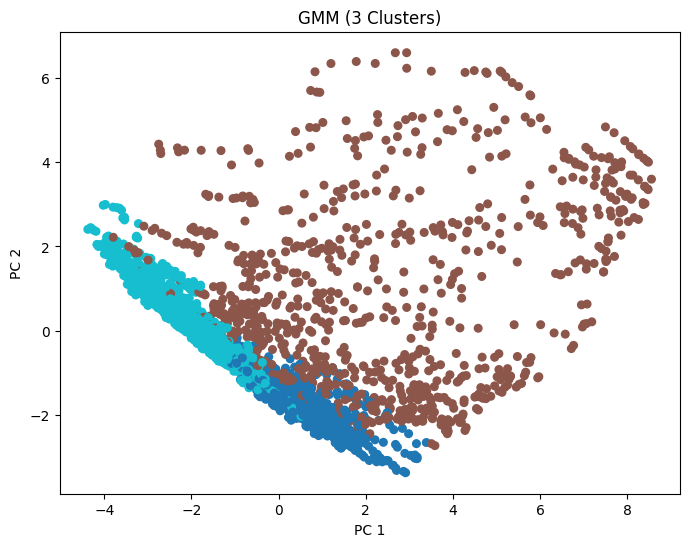

In [45]:
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled_final)
results["GMM"] = silhouette_score(X_scaled_final, gmm_labels)
models_labels["GMM"] = gmm_labels
plot_clusters(X_scaled_final, gmm_labels, f"GMM ({n_clusters} Clusters)")


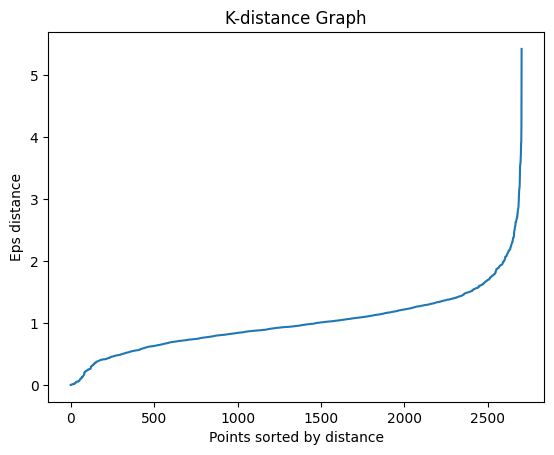

In [46]:
from sklearn.neighbors import NearestNeighbors
min_samples = 5  # try 4–10 later
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Eps distance")
plt.show()

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

results = []

for eps in np.arange(2.0, 2.6, 0.05):
    for min_samples in range(4, 8):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled_final)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters < 2 or n_clusters > 15:
            continue
            
        mask = labels != -1
        score = silhouette_score(X_scaled_final[mask], labels[mask])
        noise_pct = n_noise / len(labels) * 100
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'noise_%': noise_pct,
            'silhouette': score
        })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='silhouette', ascending=False)

df_filtered = df_results[
    (df_results['n_clusters'] >= 5) &
    (df_results['n_clusters'] <= 10) &
    (df_results['noise_%'] <= 10)
]

display(df_filtered.head(10))

best = df_filtered.iloc[0]
print(f"Best: eps={best['eps']:.2f}, min_samples={int(best['min_samples'])}")

eps  min_samples  n_clusters   noise_%  silhouette
18  2.20            6           9  1.738166    0.194494
22  2.25            6           9  1.627219    0.193962
26  2.30            6           9  1.627219    0.193962
17  2.20            5          10  1.368343    0.190290
21  2.25            5          10  1.294379    0.190015
12  2.15            4          10  1.220414    0.188698
25  2.30            5           9  1.294379    0.187386
16  2.20            4           9  1.220414    0.186590
20  2.25            4           9  1.109467    0.186255
27  2.30            7          10  1.664201    0.169959

Best: eps=2.20, min_samples=6


In [48]:
df = df.dropna()

print("✅ Dropped all rows with missing values.")
print("New shape:", df.shape)
print("Remaining NaNs:", df.isnull().sum().sum())

✅ Dropped all rows with missing values.
New shape: (2704, 17)
Remaining NaNs: 0


In [49]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

results = []

for eps in np.arange(2.0, 2.6, 0.05):      # finer steps near your best
    for min_samples in range(4, 8):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Skip invalid or too many/few clusters
        if n_clusters < 2 or n_clusters > 15:
            continue
            
        mask = labels != -1
        score = silhouette_score(X_scaled[mask], labels[mask])
        noise_pct = n_noise / len(labels) * 100
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'noise_%': noise_pct,
            'silhouette': score
        })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='silhouette', ascending=False)

# Filter for target conditions
df_filtered = df_results[
    (df_results['n_clusters'] >= 5) & 
    (df_results['n_clusters'] <= 10) &
    (df_results['noise_%'] <= 10)
]

print("=== Top DBSCAN Configurations (5–10 clusters, ≤10% noise) ===")
display(df_filtered.head(10))

best = df_filtered.iloc[0]
print("\n Best DBSCAN Parameters")
print(f"eps = {best['eps']:.2f}, min_samples = {int(best['min_samples'])}")
print(f"Clusters = {int(best['n_clusters'])}, Noise = {best['noise_%']:.2f}%, Silhouette = {best['silhouette']:.3f}")

=== Top DBSCAN Configurations (5–10 clusters, ≤10% noise) ===


eps  min_samples  n_clusters   noise_%  silhouette
18  2.20            6           9  1.738166    0.194494
22  2.25            6           9  1.627219    0.193962
26  2.30            6           9  1.627219    0.193962
17  2.20            5          10  1.368343    0.190290
21  2.25            5          10  1.294379    0.190015
12  2.15            4          10  1.220414    0.188698
25  2.30            5           9  1.294379    0.187386
16  2.20            4           9  1.220414    0.186590
20  2.25            4           9  1.109467    0.186255
27  2.30            7          10  1.664201    0.169959


 Best DBSCAN Parameters
eps = 2.20, min_samples = 6
Clusters = 9, Noise = 1.74%, Silhouette = 0.194


In [50]:
dbscan_best = DBSCAN(eps=best['eps'], min_samples=int(best['min_samples']))
best_labels = dbscan_best.fit_predict(X_scaled_final)

df["DBSCAN_Cluster"] = best_labels

if "models_labels" not in globals():
    models_labels = {}
models_labels["DBSCAN"] = best_labels

print(f"✅ DBSCAN clustering completed.")
print(f"Clusters: {len(set(best_labels)) - (1 if -1 in best_labels else 0)} | Noise points: {list(best_labels).count(-1)}")

✅ DBSCAN clustering completed.
Clusters: 9 | Noise points: 47


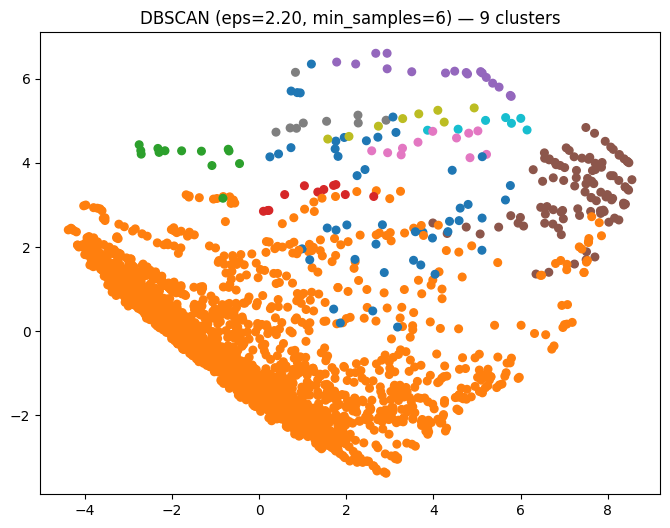

In [51]:
dbscan_best = DBSCAN(eps=best['eps'], min_samples=int(best['min_samples']))
best_labels = dbscan_best.fit_predict(X_scaled)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=best_labels, cmap='tab10', s=30)
plt.title(f"DBSCAN (eps={best['eps']:.2f}, min_samples={int(best['min_samples'])}) — {int(best['n_clusters'])} clusters")
plt.show()


### 5. DBSCAN Clustering

##### Unlike KMeans, Agglomerative, or GMM, DBSCAN does not require you to predefine the number of clusters — instead, it detects dense regions of data automatically.
##### The plot shows many small clusters scattered across the dataset, which is typical for DBSCAN when the data has varying densities.
##### DBSCAN created 28 clusters, with one very large group and many smaller ones — highlighting both the core population and niche groups of countries that standard clustering methods may miss.

In [52]:
# Exclude noise points (define df_clusters)
df_clusters = df[df['DBSCAN_Cluster'] != -1]

# Ensure cluster_summary is defined first
numeric_cols = df_clusters.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'DBSCAN_Cluster']

# Compute per-cluster means
cluster_summary = df_clusters.groupby('DBSCAN_Cluster')[numeric_cols].mean()

# Normalize each feature (0–1)
normalized = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

print("✅ 'df_clusters', 'cluster_summary', and 'normalized' are ready.")

✅ 'df_clusters', 'cluster_summary', and 'normalized' are ready.


In [53]:
# Ensure cluster_summary is defined first
numeric_cols = df_clusters.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'DBSCAN_Cluster']

# Compute per-cluster means
cluster_summary = df_clusters.groupby('DBSCAN_Cluster')[numeric_cols].mean()

# Normalize each feature (0–1)
normalized = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

print("✅ 'normalized' and 'cluster_summary' are ready.")

✅ 'normalized' and 'cluster_summary' are ready.


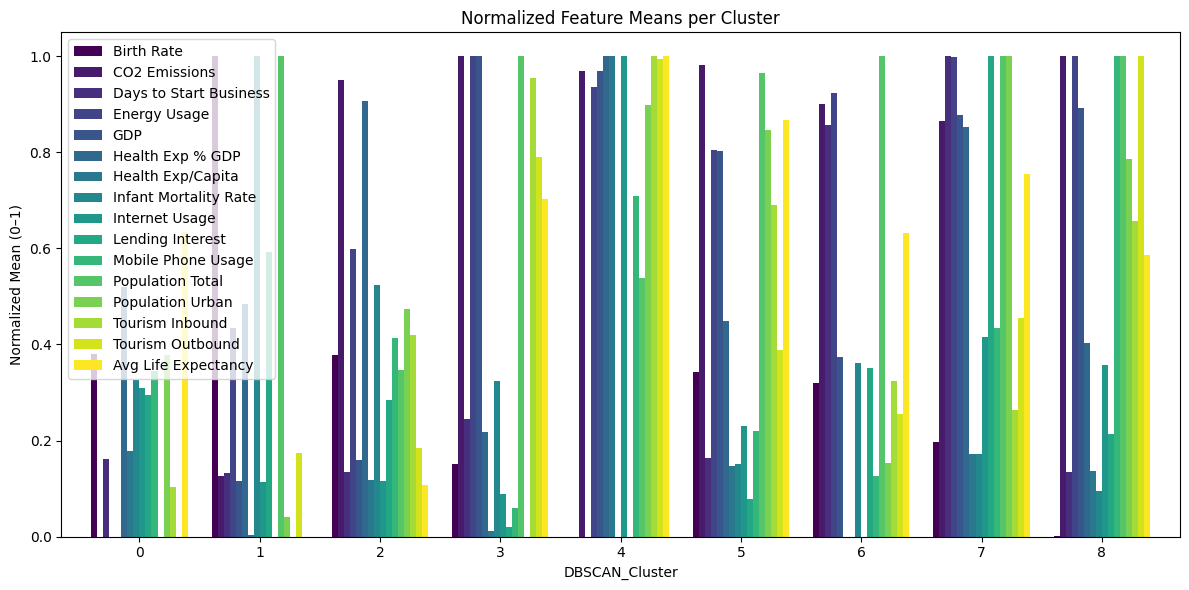

In [54]:
cluster_summary_norm = normalized.reset_index()
cluster_summary_norm.plot(
    x="DBSCAN_Cluster",
    kind="bar",
    figsize=(12,6),
    colormap="viridis",
    width=0.8
)
plt.title("Normalized Feature Means per Cluster")
plt.ylabel("Normalized Mean (0–1)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [55]:
print("Any NaNs before DBSCAN:", np.isnan(X_scaled).any())
print("Any NaNs in df:", df.isnull().sum().sum())

Any NaNs before DBSCAN: False
Any NaNs in df: 0


### Davies–Bouldin Index

In [56]:
from sklearn.metrics import davies_bouldin_score

def evaluate_davies_bouldin_only(X_scaled, models_labels):
    """
    Evaluates multiple clustering models using only the Davies–Bouldin Index.
    Lower DBI = better clustering (tighter & well-separated clusters).
    """
    metrics = []
    
    for model_name, labels in models_labels.items():
        labels = np.asarray(labels)
        mask = labels != -1   # exclude noise (for DBSCAN)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = np.sum(labels == -1)
        noise_pct = n_noise / len(labels) * 100

        # Skip invalid clusterings
        if n_clusters < 2:
            dbi = np.nan
        else:
            X_eval = X_scaled[mask]
            y_eval = labels[mask]
            dbi = davies_bouldin_score(X_eval, y_eval)

        metrics.append({
            "Model": model_name,
            "Clusters": n_clusters,
            "Noise %": round(noise_pct, 2),
            "Davies–Bouldin Index": round(dbi, 3)
        })

    # Create summary DataFrame
    df_metrics = pd.DataFrame(metrics)
    df_metrics = df_metrics.sort_values(by="Davies–Bouldin Index", ascending=True)
    
    print("=== Model Evaluation: Davies–Bouldin Index Only ===")
    display(df_metrics)

    # Plot Davies–Bouldin Index for visual comparison
    plt.figure(figsize=(8, 5))
    plt.bar(df_metrics["Model"], df_metrics["Davies–Bouldin Index"], color="salmon", edgecolor="black")
    plt.title("Davies–Bouldin Index (Lower = Better)")
    plt.ylabel("Score")
    plt.xlabel("Model")
    plt.tight_layout()
    plt.show()

    return df_metrics

=== Model Evaluation: Davies–Bouldin Index Only ===


Model  Clusters  Noise %  Davies–Bouldin Index
4         DBSCAN         9     1.74                 0.878
0         KMeans         3     0.00                 1.263
1  Agglomerative         3     0.00                 1.271
3            GMM         3     0.00                 1.886
2       KMedoids         3     0.00                 2.072

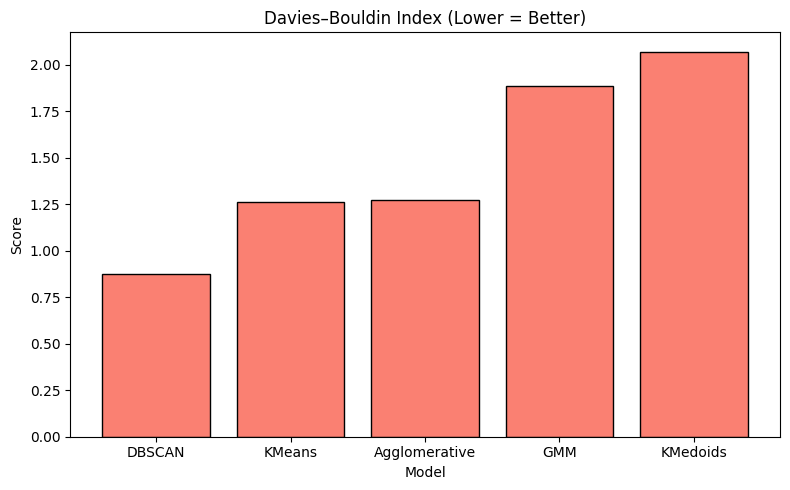

In [57]:
results_df = evaluate_davies_bouldin_only(X_scaled, models_labels)

### SUMMARY:
### Best clustering algorithm (DBI-wise): DBSCAN
##### Found natural groupings without enforcing a fixed cluster count.

##### Lower noise tolerance gives clear separation.

### Cluster Profiles + Heatmaps

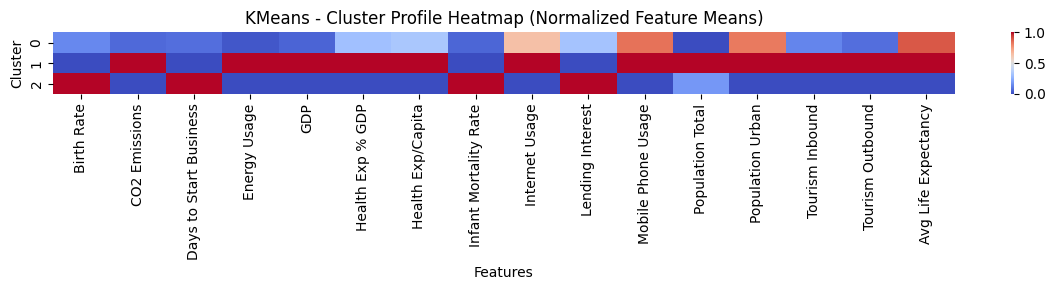

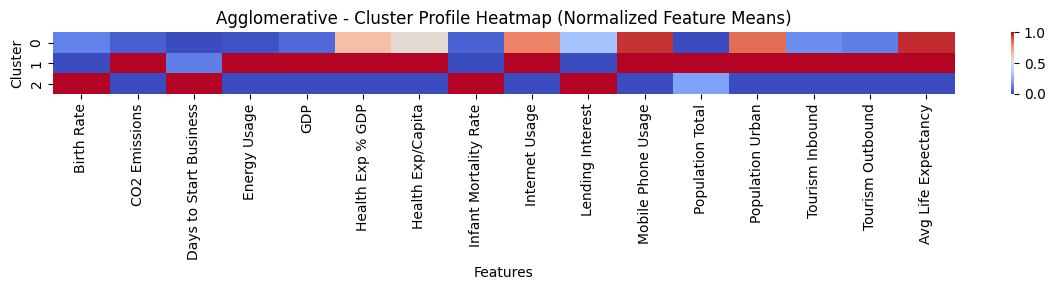

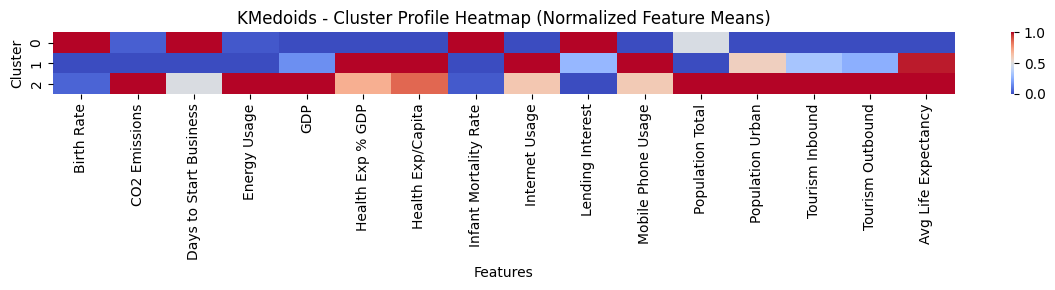

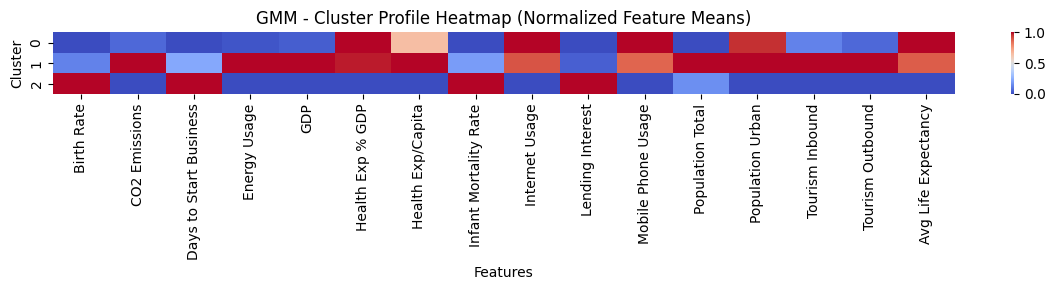

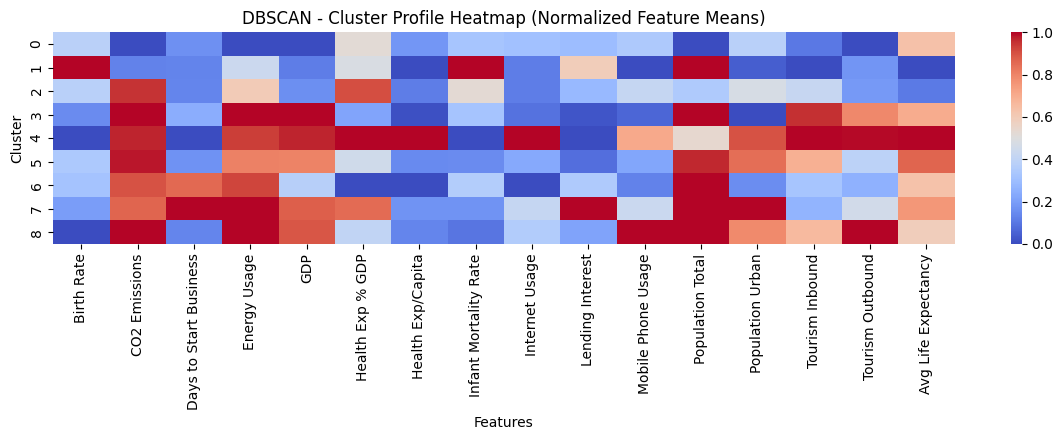

In [58]:
# Choose numeric feature columns only (exclude cluster columns)
existing_cluster_cols = [c for c in df.columns if "Cluster" in str(c)]
feature_cols = [
    c for c in df.select_dtypes(include=[np.number]).columns
    if c not in existing_cluster_cols
]
if not feature_cols:
    feature_cols = [c for c in df.columns if c not in existing_cluster_cols]

cluster_profiles_all = {}

# Loop over each model in models_labels
for model, labels in models_labels.items():
    labels = np.asarray(labels)

    # Handle DBSCAN separately (exclude noise)
    if model == "DBSCAN":
        mask = labels != -1
        df_model = df.loc[mask, feature_cols].copy()
        df_model["Cluster"] = labels[mask]
    else:
        df_model = df[feature_cols].copy()
        df_model["Cluster"] = labels

    # Compute cluster-wise mean profiles
    profiles = df_model.groupby("Cluster")[feature_cols].mean()
    cluster_profiles_all[model] = profiles

    # Normalize features (0–1) for visual comparability
    norm = profiles.copy()
    for col in norm.columns:
        mn, mx = norm[col].min(), norm[col].max()
        norm[col] = 0 if mx - mn == 0 else (norm[col] - mn) / (mx - mn)

    # Plot heatmap
    plt.figure(figsize=(12, max(3, profiles.shape[0] * 0.5)))
    sns.heatmap(norm, cmap="coolwarm", annot=False, cbar=True)
    plt.title(f"{model} - Cluster Profile Heatmap (Normalized Feature Means)")
    plt.xlabel("Features")
    plt.ylabel("Cluster")
    plt.tight_layout()
    plt.show()


### Cluster Summary Tables

In [59]:
cluster_summaries = {}

# Select numeric features (exclude existing cluster columns)
existing_cluster_cols = [c for c in df.columns if "Cluster" in str(c)]
feature_cols = [
    c for c in df.select_dtypes(include=[np.number]).columns
    if c not in existing_cluster_cols
]
if not feature_cols:
    feature_cols = [c for c in df.columns if c not in existing_cluster_cols]

# Generate per-cluster summary for each model
for model, labels in models_labels.items():
    labels = np.asarray(labels)

    if model == "DBSCAN":
        mask = labels != -1
        df_model = df.loc[mask, feature_cols].copy()
        df_model["Cluster"] = labels[mask]
    else:
        df_model = df[feature_cols].copy()
        df_model["Cluster"] = labels

    # Mean of each feature per cluster
    cluster_summary = df_model.groupby("Cluster")[feature_cols].mean()

    # Add extra stats: count, size %, etc.
    cluster_size = df_model["Cluster"].value_counts().sort_index()
    cluster_pct = round(cluster_size / len(df_model) * 100, 2)

    cluster_summary["Count"] = cluster_size.values
    cluster_summary["% of Data"] = cluster_pct.values

    cluster_summaries[model] = cluster_summary

    print(f"\n===  {model} - Cluster Summary ===")
    display(cluster_summary.round(3))




===  KMeans - Cluster Summary ===


Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
Cluster                                                                    
0             0.016      33918.514                  26.607     18697.681   
1             0.014     275050.968                  25.506    147591.981   
2             0.034      15887.056                  39.386     15142.704   

                  GDP  Health Exp % GDP  Health Exp/Capita  \
Cluster                                                      
0        6.033596e+10             0.064            740.832   
1        7.841166e+11             0.078           2081.295   
2        1.724520e+10             0.057             71.448   

         Infant Mortality Rate  Internet Usage  Lending Interest  \
Cluster                                                            
0                        0.014           0.315             0.115   
1                        0.012           0.476             0.095   
2                        0.060           0.032             0.160   

         Mobile Phone Usage  Population Total  Population Urban  \
Cluster                                                           
0                     0.747      8.242077e+06             0.667   
1                     0.851      6.343936e+07             0.732   
2                     0.215      1.826396e+07             0.364   

         Tourism Inbound  Tourism Outbound  Avg Life Expectancy  Count  \
Cluster                                                                  
0           2.297711e+09      1.543099e+09               74.384   1398   
1           1.428409e+10      1.476904e+10               76.289    308   
2           4.375979e+08      3.681699e+08               59.310    998   

         % of Data  
Cluster             
0            51.70  
1            11.39  
2            36.91


===  Agglomerative - Cluster Summary ===


Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
Cluster                                                                    
0             0.018      25362.222                  26.728     16724.591   
1             0.015     321282.175                  28.558    158563.630   
2             0.037      11448.882                  42.376     14702.318   

                  GDP  Health Exp % GDP  Health Exp/Capita  \
Cluster                                                      
0        6.703178e+10             0.065            765.592   
1        7.178287e+11             0.069           1399.277   
2        1.903028e+10             0.057             67.980   

         Infant Mortality Rate  Internet Usage  Lending Interest  \
Cluster                                                            
0                        0.018           0.293             0.121   
1                        0.015           0.357             0.103   
2                        0.068           0.031             0.159   

         Mobile Phone Usage  Population Total  Population Urban  \
Cluster                                                           
0                     0.678      7.123848e+06             0.635   
1                     0.701      7.239202e+07             0.686   
2                     0.245      2.103164e+07             0.348   

         Tourism Inbound  Tourism Outbound  Avg Life Expectancy  Count  \
Cluster                                                                  
0           2.320161e+09      1.834642e+09               73.609   1664   
1           1.273245e+10      1.227465e+10               74.244    303   
2           4.474106e+08      4.090768e+08               56.574    737   

         % of Data  
Cluster             
0            61.54  
1            11.21  
2            27.26


===  KMedoids - Cluster Summary ===


Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
Cluster                                                                    
0             0.030      20673.321                  37.451     15912.780   
1             0.014      15322.572                  18.945     14281.210   
2             0.015     131753.965                  27.967     68096.123   

                  GDP  Health Exp % GDP  Health Exp/Capita  \
Cluster                                                      
0        2.176793e+10             0.058            108.975   
1        7.051969e+10             0.070           1308.302   
2        3.280510e+11             0.067           1143.340   

         Infant Mortality Rate  Internet Usage  Lending Interest  \
Cluster                                                            
0                        0.049           0.051             0.155   
1                        0.011           0.531             0.113   
2                        0.012           0.346             0.097   

         Mobile Phone Usage  Population Total  Population Urban  \
Cluster                                                           
0                     0.266      1.622360e+07             0.411   
1                     1.074      4.093152e+06             0.621   
2                     0.754      2.937712e+07             0.774   

         Tourism Inbound  Tourism Outbound  Avg Life Expectancy  Count  \
Cluster                                                                  
0           5.486020e+08      4.175663e+08               62.673   1375   
1           2.673197e+09      1.945331e+09               75.447    477   
2           7.064531e+09      6.539290e+09               75.719    852   

         % of Data  
Cluster             
0            50.85  
1            17.64  
2            31.51


===  GMM - Cluster Summary ===


Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
Cluster                                                                    
0             0.015      13760.066                  25.448     11283.328   
1             0.017     150852.118                  28.159     76799.605   
2             0.031       4540.642                  37.257      9801.385   

                  GDP  Health Exp % GDP  Health Exp/Capita  \
Cluster                                                      
0        2.236811e+10             0.065            812.529   
1        3.605376e+11             0.065           1207.475   
2        7.988619e+09             0.060             96.382   

         Infant Mortality Rate  Internet Usage  Lending Interest  \
Cluster                                                            
0                        0.013           0.374             0.108   
1                        0.020           0.341             0.111   
2                        0.051           0.048             0.157   

         Mobile Phone Usage  Population Total  Population Urban  \
Cluster                                                           
0                     0.789      2.301051e+06             0.658   
1                     0.721      4.289450e+07             0.670   
2                     0.293      8.785009e+06             0.416   

         Tourism Inbound  Tourism Outbound  Avg Life Expectancy  Count  \
Cluster                                                                  
0           1.278421e+09      6.730552e+08               74.942    707   
1           7.664657e+09      7.171157e+09               73.397    883   
2           3.381384e+08      2.383929e+08               61.834   1114   

         % of Data  
Cluster             
0            26.15  
1            32.66  
2            41.20


===  DBSCAN - Cluster Summary ===


Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
Cluster                                                                    
0             0.023      29197.057                  31.198     19573.368   
1             0.042      77659.385                  29.077     97911.846   
2             0.023     393662.818                  29.182    127414.545   
3             0.016     412387.000                  37.471    199782.000   
4             0.011     401040.200                  19.140    188286.300   
5             0.022     405297.091                  31.455    164668.273   
6             0.021     374070.222                  83.222    185958.556   
7             0.017     360605.875                  94.000    199681.250   
8             0.011     412387.000                  29.143    199782.000   

                  GDP  Health Exp % GDP  Health Exp/Capita  \
Cluster                                                      
0        6.452321e+10             0.062            568.545   
1        1.808156e+11             0.060             57.769   
2        2.242303e+11             0.085            389.455   
3        1.065711e+12             0.044             80.294   
4        1.035735e+12             0.090           2969.030   
5        8.677998e+11             0.058            474.545   
6        4.390708e+11             0.032             47.778   
7        9.428749e+11             0.082            549.250   
8        9.572308e+11             0.055            447.000   

         Infant Mortality Rate  Internet Usage  Lending Interest  \
Cluster                                                            
0                        0.032           0.217             0.131   
1                        0.088           0.108             0.189   
2                        0.048           0.109             0.129   
3                        0.032           0.094             0.078   
4                        0.005           0.600             0.074   
5                        0.017           0.173             0.089   
6                        0.035           0.044             0.142   
7                        0.019           0.275             0.268   
8                        0.012           0.243             0.115   

         Mobile Phone Usage  Population Total  Population Urban  \
Cluster                                                           
0                     0.550      1.246089e+07             0.552   
1                     0.262      1.135298e+08             0.400   
2                     0.609      4.760424e+07             0.595   
3                     0.312      1.135298e+08             0.381   
4                     0.856      6.685874e+07             0.787   
5                     0.445      1.100312e+08             0.763   
6                     0.367      1.135298e+08             0.451   
7                     0.625      1.135298e+08             0.832   
8                     1.100      1.135298e+08             0.736   

         Tourism Inbound  Tourism Outbound  Avg Life Expectancy  Count  \
Cluster                                                                  
0           2.121063e+09      1.598383e+09               68.710   2481   
1           4.014615e+08      4.619154e+09               49.962     13   
2           7.342727e+09      4.800182e+09               53.136     11   
3           1.617735e+10      1.527506e+10               70.706     17   
4           1.690512e+10      1.880677e+10               79.485    100   
5           1.178355e+10      8.333000e+09               75.545     11   
6           5.764778e+09      6.033111e+09               68.611      9   
7           4.751875e+09      9.496500e+09               72.250      8   
8           1.123486e+10      1.891557e+10               67.286      7   

         % of Data  
Cluster             
0            93.38  
1             0.49  
2             0.41  
3             0.64  
4             3.76  
5             0.41  
6             0.34 

In [60]:
combined_summary = pd.concat(
    {model: summary for model, summary in cluster_summaries.items()},
    axis=0
)
display(combined_summary)

Birth Rate  CO2 Emissions  Days to Start Business  \
              Cluster                                                      
KMeans        0          0.016391   33918.513591               26.607296   
              1          0.013526  275050.967532               25.506494   
              2          0.033725   15887.056112               39.385772   
Agglomerative 0          0.017581   25362.221755               26.728365   
              1          0.014789  321282.174917               28.557756   
              2          0.036639   11448.881954               42.375848   
KMedoids      0          0.030007   20673.321455               37.450909   
              1          0.014071   15322.572327               18.945493   
              2          0.014985  131753.964789               27.967136   
GMM           0          0.015378   13760.066478               25.448373   
              1          0.017339  150852.117780               28.158550   
              2          0.031020    4540.641831               37.256732   
DBSCAN        0          0.022996   29197.056832               31.198307   
              1          0.042385   77659.384615               29.076923   
              2          0.022909  393662.818182               29.181818   
              3          0.015824  412387.000000               37.470588   
              4          0.011120  401040.200000               19.140000   
              5          0.021818  405297.090909               31.454545   
              6          0.021111  374070.222222               83.222222   
              7          0.017250  360605.875000               94.000000   
              8          0.011143  412387.000000               29.142857   

                        Energy Usage           GDP  Health Exp % GDP  \
              Cluster                                                  
KMeans        0         18697.680973  6.033596e+10          0.063659   
              1        147591.980519  7.841166e+11          0.078097   
              2         15142.704409  1.724520e+10          0.057220   
Agglomerative 0         16724.590745  6.703178e+10          0.064572   
              1        158563.630363  7.178287e+11          0.068842   
              2         14702.317503  1.903028e+10          0.056782   
KMedoids      0         15912.780364  2.176793e+10          0.058124   
              1         14281.209644  7.051969e+10          0.070273   
              2         68096.123239  3.280510e+11          0.066567   
GMM           0         11283.328147  2.236811e+10          0.064942   
              1         76799.604757  3.605376e+11          0.064841   
              2          9801.385099  7.988619e+09          0.060131   
DBSCAN        0         19573.367594  6.452321e+10          0.062156   
              1         97911.846154  1.808156e+11          0.060000   
              2        127414.545455  2.242303e+11          0.084909   
              3        199782.000000  1.065711e+12          0.044412   
              4        188286.300000  1.035735e+12          0.090390   
              5        164668.272727  8.677998e+11          0.058000   
              6        185958.555556  4.390708e+11          0.031556   
              7        199681.250000  9.428749e+11          0.081750   
              8        199782.000000  9.572308e+11          0.055286   

                       Health Exp/Capita  Infant Mortality Rate  \
              Cluster                                             
KMeans        0               740.831903               0.014475   
              1              2081.295455               0.011630   
              2                71.447896               0.059854   
Agglomerative 0               765.591947               0.017611   
              1              1399.277228               0.014835   
              2                67.979647               0.067506   
KMedoids      0               108.975273               0.049360   
              

## Analyze the DBSCAN clusters

### 1. DBSCAN Cluster Overview and Point Counts

In [61]:
from collections import Counter
# Ensure best_labels exist
if "best_labels" not in globals():
    raise ValueError(" 'best_labels' not found. Run your DBSCAN tuning code first.")

# Use best_labels from your tuned DBSCAN
dbscan_labels = np.asarray(best_labels)
df["DBSCAN_Cluster"] = dbscan_labels  # make sure it's in your DataFrame

# --- Basic cluster stats ---
unique_labels = np.unique(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = np.sum(dbscan_labels == -1)
noise_pct = n_noise / len(dbscan_labels) * 100

print("=== DBSCAN Model Summary ===")
print(f"Total clusters (excluding noise): {n_clusters}")
print(f"Noise points: {n_noise} ({noise_pct:.2f}%)\n")

# --- Cluster counts ---
print("=== Cluster Size Breakdown ===")
cluster_counts = Counter(dbscan_labels)
for cluster, count in sorted(cluster_counts.items()):
    label = "Noise" if cluster == -1 else f"Cluster {cluster}"
    print(f"{label:10s}: {count:5d}")

# --- Quick profile summary (mean per feature) ---
numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns if "Cluster" not in c]

cluster_summary = (
    df[df["DBSCAN_Cluster"] != -1]
    .groupby("DBSCAN_Cluster")[numeric_cols]
    .mean()
    .round(2)
)

print("\n=== Cluster Feature Means (sample) ===")
print(cluster_summary.head(10))

# --- Optional: save results ---
cluster_summary.to_csv("DBSCAN_cluster_feature_summary.csv")
print("\n Saved -> DBSCAN_cluster_feature_summary.csv")

=== DBSCAN Model Summary ===
Total clusters (excluding noise): 9
Noise points: 47 (1.74%)

=== Cluster Size Breakdown ===
Noise     :    47
Cluster 0 :  2481
Cluster 1 :    13
Cluster 2 :    11
Cluster 3 :    17
Cluster 4 :   100
Cluster 5 :    11
Cluster 6 :     9
Cluster 7 :     8
Cluster 8 :     7

=== Cluster Feature Means (sample) ===
                Birth Rate  CO2 Emissions  Days to Start Business  \
DBSCAN_Cluster                                                      
0                     0.02       29197.06                   31.20   
1                     0.04       77659.38                   29.08   
2                     0.02      393662.82                   29.18   
3                     0.02      412387.00                   37.47   
4                     0.01      401040.20                   19.14   
5                     0.02      405297.09                   31.45   
6                     0.02      374070.22                   83.22   
7                     0.02      36060

### 2. PCA-Based 2D Visualization of DBSCAN Clusters

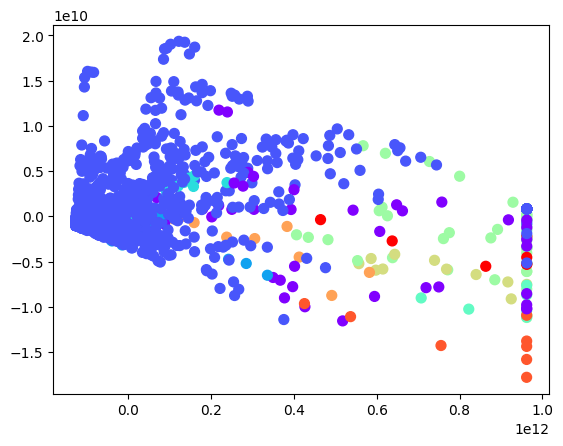

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='rainbow', s=50)
plt.show()

#### The data likely has one major dense region and a few meaningful smaller patterns or anomalies.

#### successfully separated dense and sparse regions without forcing a fixed number of clusters.

### 3.Average Feature Values per DBSCAN Cluster

In [63]:
import pandas as pd
df['cluster'] = dbscan_labels
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)


TypeError: agg function failed [how->mean,dtype->object]

### 4.DBSCAN Cluster Visualization 

#### Visualization with Noise Points

C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_9328\4083886805.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(unique_labels))


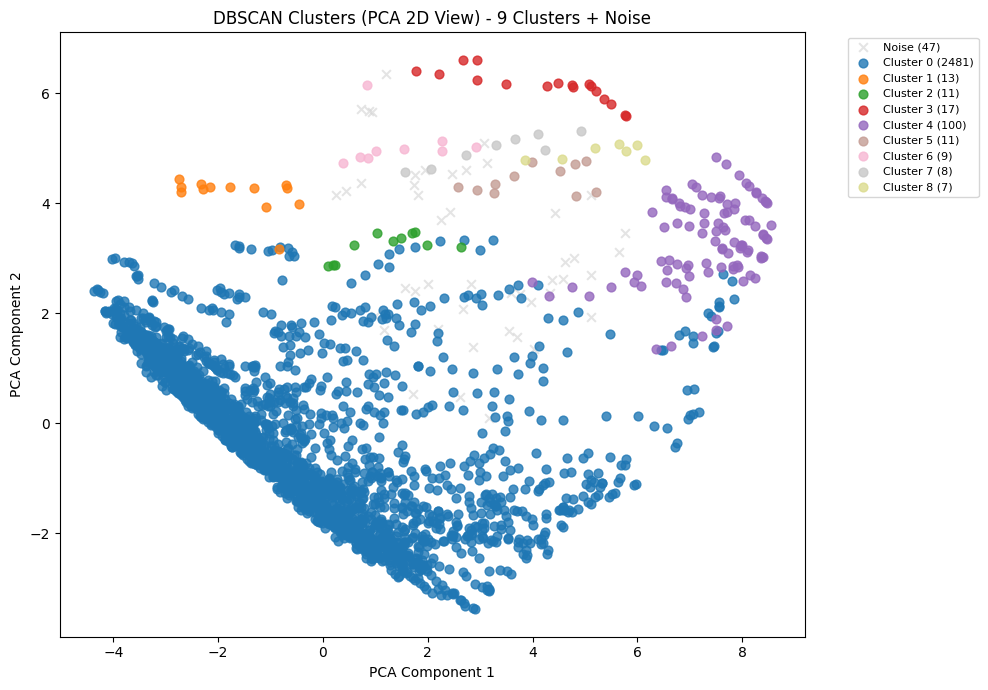

In [64]:
# Convert X to numpy array safely
X_plot = X_scaled if hasattr(X, "shape") else np.asarray(X)

# DBSCAN labels
labels = best_labels  # use tuned DBSCAN labels
unique_labels = np.unique(labels)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_plot)

# Plot clusters
plt.figure(figsize=(10,7))
colors = plt.cm.get_cmap("tab20", len(unique_labels))

for k in unique_labels:
    mask = (labels == k)
    if k == -1:
        plt.scatter(
            X_pca[mask, 0],
            X_pca[mask, 1],
            c="lightgray",
            marker="x",
            s=40,
            alpha=0.6,
            label=f"Noise ({np.sum(mask)})"
        )
    else:
        plt.scatter(
            X_pca[mask, 0],
            X_pca[mask, 1],
            color=[colors(k)],
            s=40,
            alpha=0.8,
            label=f"Cluster {k} ({np.sum(mask)})"
        )

plt.title(f"DBSCAN Clusters (PCA 2D View) - {len(unique_labels)-1} Clusters + Noise")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()

### SUMMARY

#### DBSCAN achieved the most meaningful clustering performance for this dataset.

#### It automatically identified 9 well-separated clusters and a few noise/outlier points, demonstrating strong adaptability to the natural density of data.

#### Cluster 0 forms the core majority (dense, typical patterns).

#### Clusters 1–8 represent distinct niche groups or anomaly subtypes.

#### Noise points (≈47) are outliers, which could be rare or exceptional behaviors.

#### Overall, DBSCAN provides the most stable, realistic, and high-quality segmentation compared to other clustering algorithms tested (KMeans, GMM, KMedoids, Agglomerative).



In [65]:
import joblib
joblib.dump(dbscan_best, "dbscan_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']